# PREVENTING BANK CUSTOMER CHURN  

## " Exploratory Data Analysis and Prediction "

###  By Sidhant

## 1. Introduction 

we aim to accomplish the following for this study :
1. Identify and visualize which factors contribute to customer churn
2. Build a prediction model that will perform the following :
 
   * Classify if a customer is going to churn or not
   * preferably and based on model performance , choose a model that will attach a probability of churn to a customer to make it easier for                  customer service to target low hanging fruits in their efforts to prevent churn 
       
       

## 2. Dataset review and preparation 
In this section we will seek to explore the structure of our data:
   1. To understand the input space of the dataset
   2. To prepare the sets for exploratory analysis and prediction tasks 



In [1]:
## Required Libraries 
## For data wrangling 
import numpy as np 
import pandas as pd 

# For Visualization 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
pd.options.display.max_rows = None 
pd.options.display.max_columns = None 

In [8]:
# Reading the Dataframe 
df = pd.read_csv(r"C:\Users\smoni\Downloads\Churn_Modelling.csv" , delimiter = ',')
df.shape

(10000, 14)

The Df has 10000 rows with 14 attributes . We review this further to identify which attributes will be necesssary and What data manipulation needs to be carried out before Exploratory analysis and Prediction Modelling . 

In [9]:
# Checking Columns lists and missing values 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Well isn't there a rare sight; no missing values 

In [10]:
# Get unique count for each variable 
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above output , we came to this conclusion that we will not require first 2 attributes as they are specific to a customer . It is borderline with the surname as this would result to profiling so we will exclude this as well .  

In [12]:
# Dropping the columns as explained above 
df = df.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1 )

In [13]:
# Review the top rows of what is Left of the Data frame 
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


From the above a couple of questions lingers:
1. The data appears to be a snapshot at some point of time example balance is for a given date which arises a lot of questions:
    * What date is it and what is the relevance of this date
    * would it be possible to obtain balances over a period of time as opposed to a single date.
2. There are customers who have exited but still have a balance in their account . What would this   mean ? Could they have exited from the product and not the bank ?
3. What does being an active member mean
4. Would it be better to provide transaction counts both in credits and debits to the account instead?
5.  A breakdown of products bought by a customer could provide more information topping listing of product count

For this Problem , we need to model without context even though typically having context and better understanding of the data extraction process would give us a better insight and possibly lead to better and contextual results of modeling process 

In [14]:
# Checking variable datatypes 
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So mostly we have categorical variables and 5 continuous variables 

## 3. Exploratory Data Analysis 

Here our main interest is to get an understanding as how the given attributes relate to the 'Exit' status 

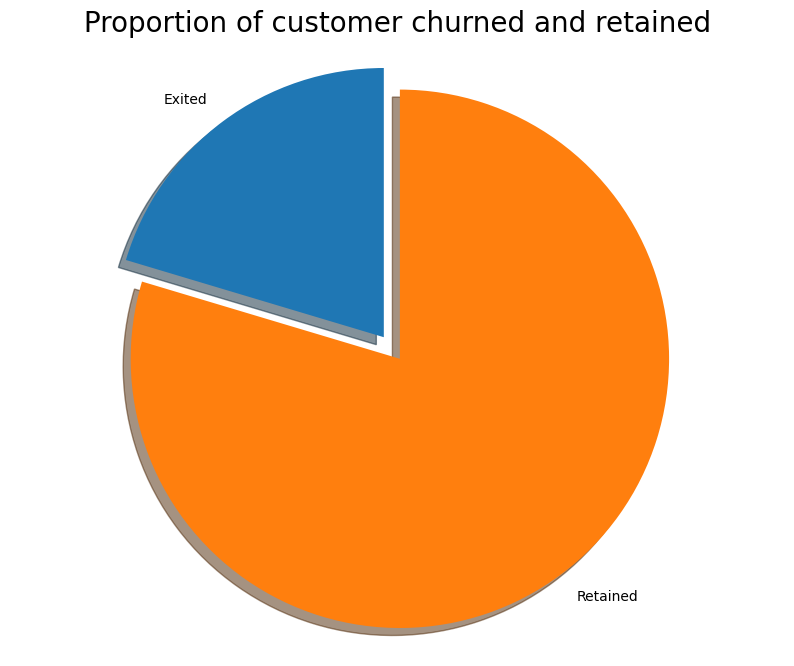

In [15]:
labels = ('Exited' , 'Retained') 
sizes = [ df.Exited[df['Exited']==1].count() , df.Exited[df['Exited']==0].count() ]
explode = ( 0 , 0.1 ) 
fig1 ,ax1 = plt.subplots(figsize = (10,8))
ax1.pie( sizes , explode = explode ,labels = labels , shadow = True , startangle = 90 ) 
ax1.axis( 'equal')
plt.title( " Proportion of customer churned and retained " , size = 20 )
plt.show()

So about 20% customers have churned . So the baseline model could be to predict that 20% of the customers will churn . Given 20% is a small number so we need to ensure our model will predict with great accuracy this 20% as it is of interest to the bank to identify the customers which are likely to churn as opposed to the customers that are retained .

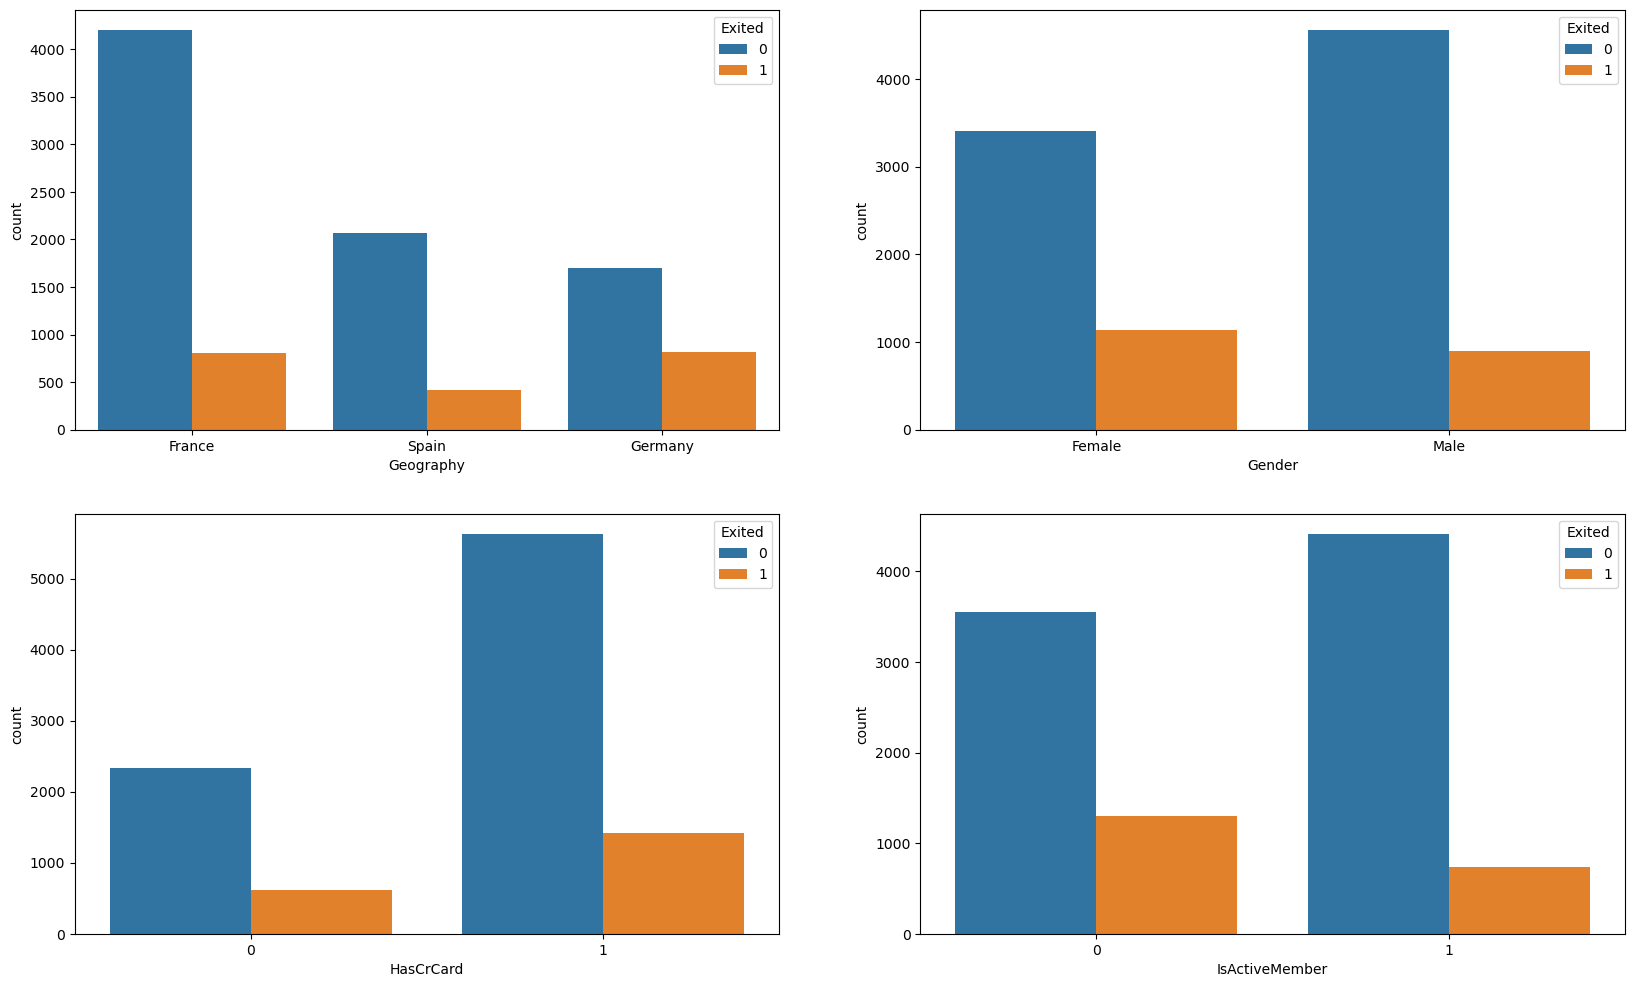

In [20]:
# we first review the "Status" in relation with the Categorical Variables
fig , axarr = plt.subplots( 2 ,2 , figsize = ( 20 , 12))
sns.countplot( x = "Geography" , hue = "Exited" , data = df , ax = axarr[0][0] )
sns.countplot( x = "Gender" , hue = "Exited" , data = df , ax = axarr[0][1] )
sns.countplot( x = "HasCrCard" , hue = "Exited" , data = df , ax = axarr[1][0] )
sns.countplot( x = "IsActiveMember" , hue = "Exited" , data = df , ax = axarr[1][1] )
plt.show()


We note the following :
* Majority of the data is from France . However , the proportion of churned customers is inversely related to the population of customers alluding to the bank possibly having a problem of maybe not enough customer service resources allocated in the areas where it has fewer clients
* The proportion of churnig of female customers churning is also greater than that of male customers
* Interestingly , majority of the customers that churned are those with the Credit Card but this does not conclude anything because the no. of creditcard holders are also significantly high
* The Inactive memberes have a greater churn . The overall proportion of total inactive members who churned to total number of inactive members is also significantly higher than the proportion of the total number of active members who churned to total active members . Suggesting that the Bank may need to implement a program to turn this group of inactive members to active members as this will definitely have a positive impact on the customer churn.  

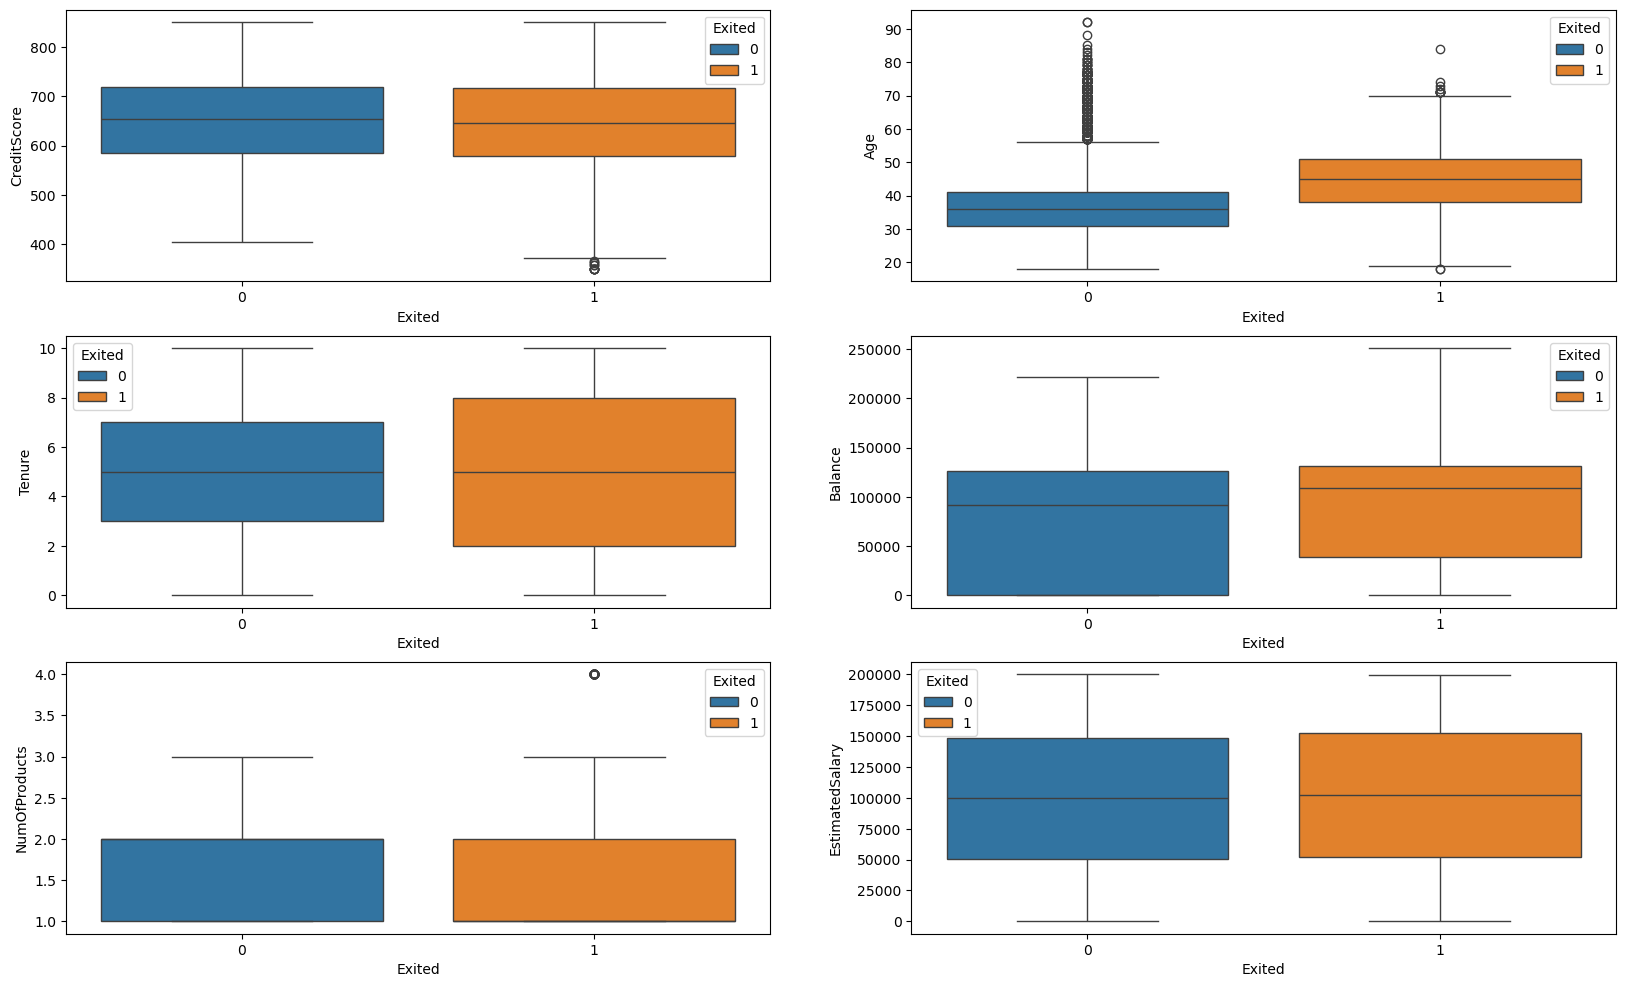

In [28]:
# Relations based on the continuous data attributes 
fig ,axarr = plt.subplots( 3 ,2 , figsize = ( 20 , 12 )) 
sns.boxplot( y = "CreditScore" , x = "Exited" , hue = "Exited" , data = df , ax = axarr[0][0] ) 
sns.boxplot( y = "Age" , x = "Exited" , hue = "Exited" , data = df , ax = axarr[0][1] ) 
sns.boxplot( y = "Tenure" , x = "Exited" , hue = "Exited" , data = df , ax = axarr[1][0] ) 
sns.boxplot( y = "Balance" , x = "Exited" , hue = "Exited" , data = df , ax = axarr[1][1] ) 
sns.boxplot( y = "NumOfProducts" , x = "Exited" , hue = "Exited" , data = df , ax = axarr[2][0] ) 
sns.boxplot( y = "EstimatedSalary" , x = "Exited" , hue = "Exited" , data = df , ax = axarr[2][1] )
plt.show()


We note the following points : 
* There is no significant difference in the credit score distribution between churned and retained customers
* The Older Customers are churning more than the younger ones alluding to the difference in service preference in the age categories . The Bank may need to review their target Market or review the stratety for retention between the different age groups.
* With regard to the tenure , The Clients are either on extreme end( spent little time with the bank or a lot of time with the bank ) are more likely to churn compared to those that are of average tenure
* Worringly , the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the number of products nor the salary has a significant effect on the likelihood to churn   

## 4. Feature Engineering 

We seek to add features that are likely to have an impact on the probability of churning . We first split the train and test sets 

In [212]:
# Splitting the data into training and test data 
df_train = df.sample( frac = 0.8 , random_state = 200) 
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


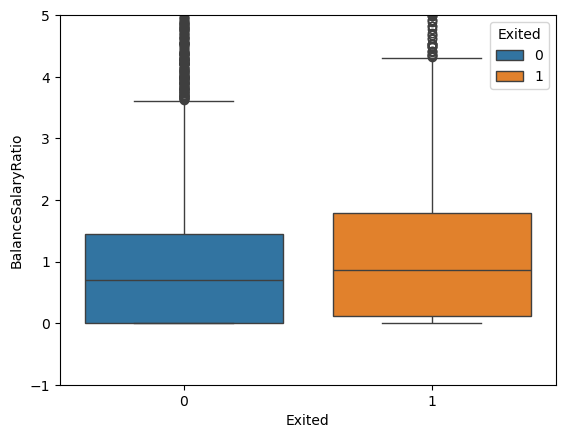

In [213]:
df_train["BalanceSalaryRatio"] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot( y = "BalanceSalaryRatio" , x = "Exited" , hue = "Exited" , data = df_train)
plt.ylim(-1,5) 
plt.show()

We saw that the salary had a little impact on the chance of a customer churning . However as seen above , the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of their loan capital 

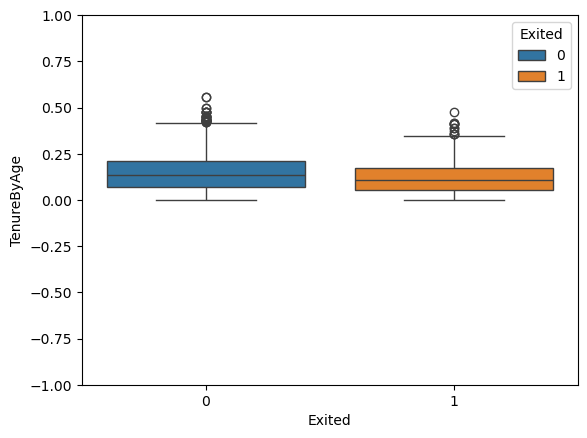

In [214]:
# Given that tenure is a function of age , we introduce a variable aiming to standardize tenure over age:
df_train["TenureByAge"] = df_train.Tenure/(df_train.Age) 
sns.boxplot( y = "TenureByAge" , x = "Exited" , hue = "Exited" , data = df_train)
plt.ylim( -1 , 1) 
plt.show() 

In [215]:
# Lastly we introduce a variable to capture credit score given age to take into account credit behaviour versus adult life 
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [38]:
# Resulting DataFrame 
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,CreditScoreGivenAge,TenureByAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,18.440000,0.240000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,17.685714,0.114286
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,17.475000,0.200000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,13.609756,0.048780
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,18.764706,0.147059


## 5. Data Preparation for Model Fitting 

In [216]:
# Arranging the columns by data type for easier manipulation 
continuous_vars = ['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'NumOfProducts' , 'EstimatedSalary' , 'BalanceSalaryRatio',
                   'TenureByAge' , 'CreditScoreGivenAge']
cat_vars = ['HasCrCard' , 'IsActiveMember' , 'Geography' , 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [217]:
# For the one hot variables , we change 0 to -1 so that the models can capture a negative relation where the attribute is inapplicable instead of 0
df_train.loc[df_train.HasCrCard == 0 , 'HasCrCard'] = -1 
df_train.loc[df_train.IsActiveMember == 0 , 'IsActiveMember'] = -1 
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [218]:
# One hot encoding the Categorical Variables 
lst = [ "Geography" , "Gender" ]
remove = list()
for i in lst:
        for j in df_train[i].unique():
            df_train[i + "_" + j] = np.where(df_train[i] == j , 1 , -1 )
            remove.append(i)
df_train = df_train.drop(remove , axis = 1)  
df_train.head()


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [219]:
# MinMax Scaling the Continuous variables 
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars] - minVec)/( maxVec - minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [220]:
# data prep pipeline for test data 

def Dfpreppipeline( df_predict , df_train_cols , minVec , maxVec):
    
    # Adding new features 
    
    df_predict['BalanceSalaryRatio'] = df_predict.Balance /( df_predict.EstimatedSalary)
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age)
    
    #Reordering the Columns 
    
    continuous_vars = ['CreditScore' , 'Age' , 'Tenure' , 'Balance' , 'NumOfProducts' , 'EstimatedSalary' , 'BalanceSalaryRatio',
                   'TenureByAge' , 'CreditScoreGivenAge']
    cat_vars = ['HasCrCard' , 'IsActiveMember' , 'Geography' , 'Gender']
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    
    # Change 0 in categorical variable to -1 
    
    df_predict.loc[df_predict.HasCrCard == 0 , 'HasCrCard'] = -1 
    df_predict.loc[df_predict.IsActiveMember == 0 , 'IsActiveMember'] = -1 
    
    # one hot encoding of the category variables
    
    lst = ["Geography" , "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i + "_" + j] = np.where(df_predict[i] == j , 1 , -1 )
            remove.append(i) 
    df_predict = df_predict.drop(remove , axis = 1 )
    
    # Ensuring that all one hot encoded variables that appear in the training data appear in the subsequent data 
    # Although there is no need to ensure this because we have already covered all the columns 
        
    L = list(set(df_train_cols) - set(df_predict.columns))
    for l in L : 
        df_predict[str(l)] = -1 
        
    # MinMax Scaling continuous variables based on min and max from the train data
    
    df_predict[continuous_vars] = (df_predict[continuous_vars] - minVec)/( maxVec - minVec)
    
    # Ensure that the variables are ordered in the same way as was ordered in the train set 
    
    df_predict = df_predict[df_train_cols]
    return df_predict 

## 6. Model Fitting and Selection of Best Fit Model 

For the Model Fitting , I will try out the following 
* Logistic Regression in the Primal Space and with different kernels
* SVM in the Primal Space and with different kernels and
* Ensemble models 

In [60]:
# Support Functions 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [55]:
# Scoring Functions 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 

In [54]:
# Scoring Functions 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 

In [134]:
# Function to give best model score and parameters 
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores( y_actual , method1 , method2):
    auc_score = roc_auc_score(y_actual , method1);
    fpr_df , tpr_df, _ = roc_curve( y_actual , method2);
    return ( auc_score , fpr_df , tpr_df ) 
    

## This Section will take a long time to run , so you are free to skip to the next section to where i have fitted the better models from this section 

In [59]:
# Fitting primal logistic regression 
parameters_grid = { 'C' : [ 0.1 , 0.5 , 1 , 10 , 50 , 100 ] , 'max_iter' : [250] , 'fit_intercept' : [True] , 'intercept_scaling':[1] , 'penalty' : ['l2'] , 'tol' : [0.00001,0.0001,0.000001]}
log_primal_grid = GridSearchCV( LogisticRegression( solver = 'lbfgs' ) , parameters_grid , cv = 10 , refit = True , verbose = 0 )
log_primal_grid.fit(df_train.loc[ : , df_train.columns != 'Exited'] , df_train.Exited ) 
best_model( log_primal_grid ) 


C:\Users\smoni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smoni\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.815625
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=250)


In [74]:
# Fitting the Logistic regression with degree 2 polynomial kernel 
parameters_grid = { 'C' : [ 0.1 , 10 , 50 ] , 'max_iter' : [250 , 300 ] , 'fit_intercept' : [True] , 'intercept_scaling':[1] , 'penalty' : ['l2'] , 'tol' : [0.00001,0.0001,0.000001]}
polynomial2 = PolynomialFeatures(degree = 2 ) 
df_train_pol2 = polynomial2.fit_transform( df_train.loc[ : , df_train.columns != 'Exited'] ) 
log_pol2_Grid = GridSearchCV( LogisticRegression( solver = 'liblinear' ) , parameters_grid , cv = 10 , refit = True , verbose = 0)
log_pol2_Grid.fit( df_train_pol2 , df_train.Exited ) 
best_model(log_pol2_Grid ) 

0.8564999999999999
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=50, max_iter=250, solver='liblinear', tol=1e-05)


In [75]:
# Fitting SVM with RBF kernel 
parameters_grid = { 'C' : [ 0.5 , 1 ,10 ,50 , 150 ] , 'gamma' : [ 0.1 , 0.01 , 0.001 ] , 'probability' : [True] , 'kernel' : ['rbf']}
SVM_grid = GridSearchCV(SVC(random_state = 0) , parameters_grid , cv = 5 , refit = True , verbose = 0)
SVM_grid.fit( df_train.loc[:, df_train.columns != 'Exited'] , df_train.Exited )
best_model( SVM_grid ) 

0.8522500000000001
{'C': 150, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=150, gamma=0.1, probability=True, random_state=0)


In [ ]:
# Fitting SVM with pol kernel 
parameters_grid = { 'C' : [ 0.5 , 1 ,10 ,50 , 150 ] , 'gamma' : [ 0.1 , 0.01 , 0.001 ] , 'kernel' : 'poly' , 'probability' : [True] , 'kernel' : ['rbf']}
SVM_grid = GridSearchCV(SVC(random_state = 0) , parameters_grid , cv = 5 , refit = True , verbose = 0)
SVM_grid.fit( df_train.loc[:, df_train.columns != 'Exited'] , df_train.Exited )
best_model( SVM_grid ) 

In [ ]:
# Fit Random Forest Classifier 
parameters_grid = { 'max_depth' : [ 3,5,6,7,8 ] , 'max_features' : [2,4,6,7,8,9] , 'n_estimators' : [50,100] , 'min_samples_split' : [3,5,6,7]}
RandForest_grid = GridSearchCV( RandomForestClassifier() , parameters_grid , cv = 5 , refit = TRUE , verbose = 0 ) 
RandForest_grid.fit( df_train.loc[: , df_train.columns != 'Exited'] , df_train.Exited) 
best_model(RandForest_grid)

## Fit Best Models 


In [111]:
# Fit primal Logistic Regression 
logistic_primal = LogisticRegression( C = 100 , class_weight = None , dual = False , fit_intercept = True , intercept_scaling = 1 , max_iter = 300 , penalty = 'l2' , random_state = None , solver = 'lbfgs' , tol = 0.000001 , verbose = 0 , warm_start = False )
logistic_primal.fit( df_train.loc[ : , df_train.columns != 'Exited'] , df_train.Exited ) 

LogisticRegression(C=100, max_iter=300, tol=1e-06)

In [110]:
# Fit logistic regression with pol 2 kernel 
polynomial2 = PolynomialFeatures( degree = 2 ) 
df_train_poly2 = polynomial2.fit_transform(df_train.loc[ : , df_train.columns != 'Exited'] , df_train.Exited)
logistic_poly2 = LogisticRegression( C = 100 , class_weight = None , dual = False , fit_intercept = True , intercept_scaling = 1 , max_iter = 300 , penalty = 'l2' , random_state = None , solver = 'liblinear' , tol = 0.000001 , verbose = 0 , warm_start = False )
logistic_poly2.fit(df_train_poly2 , df_train.Exited ) 

LogisticRegression(C=100, max_iter=300, solver='liblinear', tol=1e-06)

In [112]:
# Fitting SVM with pol kernel 
SVM_POL = SVC( C = 100 , cache_size = 200 ,class_weight = None , coef0 = 0.0 , decision_function_shape = 'ovr' , degree = 2 , gamma = 0.1 , kernel = 'poly' , max_iter = -1 , probability = True , shrinking = True , tol = 0.001)
SVM_POL.fit( df_train.loc[ : , df_train.columns != 'Exited'] , df_train.Exited) 

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [107]:
# Fitting SVM with RBF kernel 
SVM_RBF = SVC( C = 100 , cache_size = 200 ,class_weight = None , coef0 = 0.0 , decision_function_shape = 'ovr' , degree = 2 , gamma = 0.1 , kernel = 'rbf' , max_iter = -1 , probability = True , shrinking = True , tol = 0.001)
SVM_RBF.fit( df_train.loc[ : , df_train.columns != 'Exited'] , df_train.Exited) 

SVC(C=100, degree=2, gamma=0.1, probability=True)

In [90]:
# Fitting Random Forest Classifier 
RF = RandomForestClassifier( bootstrap = True , class_weight = None , criterion = 'gini' , max_depth = 8 , max_features = 6 , max_leaf_nodes = None , min_impurity_decrease = 0.0  , min_samples_leaf = 1 , min_samples_split = 3 , min_weight_fraction_leaf = 0.0 , n_estimators = 50 , n_jobs = None , oob_score = False , random_state = None , verbose = 0 , warm_start = False ) 
RF.fit( df_train.loc[ : , df_train.columns != 'Exited' ] , df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

## Review Best Model Fit Accuracy : keen Interest is on the performance in predicting 1's in other words Customers who Churn   

In [92]:
print( classification_report( df_train.Exited , logistic_primal.predict( df_train.loc[: , df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



In [98]:
print( classification_report( df_train.Exited , logistic_poly2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6353
           1       0.76      0.49      0.59      1647

    accuracy                           0.86      8000
   macro avg       0.82      0.72      0.75      8000
weighted avg       0.85      0.86      0.85      8000



In [104]:
print( classification_report( df_train.Exited , SVM_RBF.predict( df_train.loc[: , df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [113]:
print( classification_report( df_train.Exited , SVM_POL.predict( df_train.loc[: , df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [125]:
print( classification_report( df_train.Exited , RF.predict( df_train.loc[: , df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.88      0.52      0.65      1647

    accuracy                           0.89      8000
   macro avg       0.89      0.75      0.79      8000
weighted avg       0.89      0.89      0.88      8000



In [137]:
y = df_train.Exited 
X = df_train.loc[ : , df_train.columns != 'Exited']
X_poly2 = df_train_pol2 
auc_log_primal , fpr_log_primal , tpr_log_primal = get_auc_scores( y , logistic_primal.predict(X) , logistic_primal.predict_proba(X)[: , 1])
auc_log_poly2 , fpr_log_poly2 , tpr_log_poly2 = get_auc_scores( y , logistic_poly2.predict(X_poly2) , logistic_poly2.predict_proba(X_poly2)[: , 1])
auc_SVM_RBF , fpr_SVM_RBF , tpr_SVM_RBF = get_auc_scores( y , SVM_RBF.predict(X) , SVM_RBF.predict_proba(X)[: , 1])
auc_SVM_POL , fpr_SVM_POL , tpr_SVM_POL = get_auc_scores( y , SVM_POL.predict(X) , SVM_POL.predict_proba(X)[: , 1])
auc_RF , fpr_RF , tpr_RF = get_auc_scores( y , RF.predict(X) , RF.predict_proba(X)[: , 1])

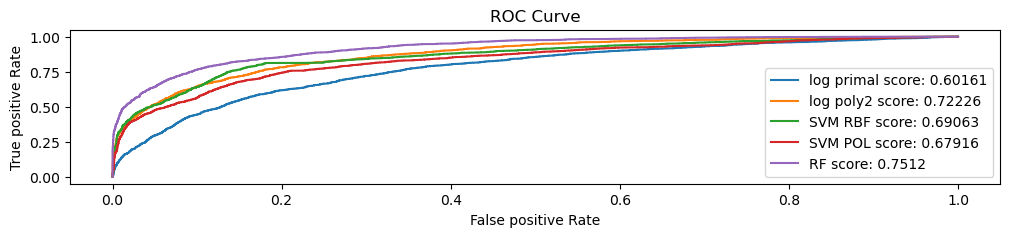

In [156]:
plt.figure( figsize = (12,2) , linewidth = 1 ) 
plt.plot( fpr_log_primal , tpr_log_primal , label = 'log primal score: ' + str(round(auc_log_primal , 5)) )
plt.plot( fpr_log_poly2 , tpr_log_poly2 , label = 'log poly2 score: ' + str(round(auc_log_poly2 , 5)) )
plt.plot( fpr_SVM_RBF , tpr_SVM_RBF , label = 'SVM RBF score: ' + str(round(auc_SVM_RBF , 5)) )
plt.plot( fpr_SVM_POL , tpr_SVM_POL , label = 'SVM POL score: ' + str(round(auc_SVM_POL , 5)) )
plt.plot( fpr_RF , tpr_RF , label = 'RF score: ' + str(round(auc_RF , 5)) )
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title( 'ROC Curve')
plt.legend(loc = 'best')
plt.show()

## From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance to me than the overall accuracy score of the model.
## Given that in the data we only had 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.
## From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

## Test model prediction on accuracy on the test data 

In [221]:
# Make the data transformation for test data 
df_test = Dfpreppipeline( df_test , df_train.columns , minVec , maxVec)
df_test = df_test.mask(np.isinf( df_test ))
df_test = df_test.dropna()
df_test.shape


C:\Users\smoni\AppData\Local\Temp\ipykernel_60748\96091940.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i + "_" + j] = np.where(df_predict[i] == j , 1 , -1 )
C:\Users\smoni\AppData\Local\Temp\ipykernel_60748\96091940.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i + "_" + j] = np.where(df_predict[i] == j , 1 , -1 )
C:\Users\smoni\AppData\Local\Temp\ipykernel_60748\96091940.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


(2000, 17)

In [222]:
print(classification_report( df_test.Exited , RF.predict( df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1610
           1       0.76      0.45      0.57       390

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000



In [209]:
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,0.304,-1,-1,0.324324,0.8,0.636357,0.666667,1,-1,0.569485,1
3,0.698,-1,-1,0.283784,0.1,0.000000,0.333333,-1,-1,0.468912,0
5,0.590,-1,-1,0.351351,0.8,0.453394,0.333333,1,-1,0.748699,1
17,0.398,-1,-1,0.081081,0.9,0.000000,0.333333,1,1,0.071617,0
18,0.474,-1,-1,0.364865,0.6,0.000000,0.000000,-1,-1,0.793361,0


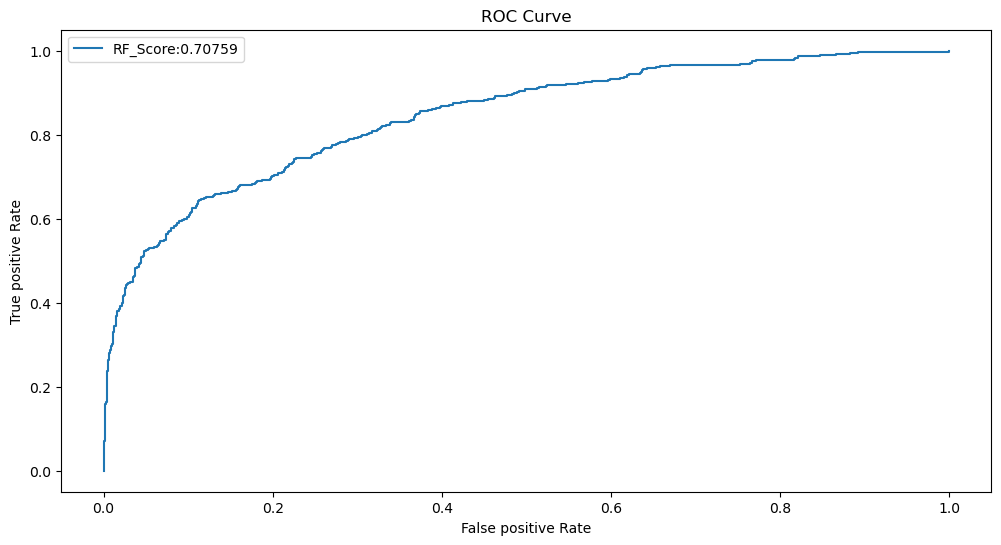

In [227]:
auc_RF_test , fpr_RF_test , tpr_RF_test = get_auc_scores( df_test.Exited , RF.predict(df_test.loc[: , df_test.columns != 'Exited']) , RF.predict_proba(df_test.loc[: , df_test.columns != 'Exited'])[: ,1])
plt.figure( figsize = (12,6) , linewidth = 1)
plt.plot(fpr_RF_test , tpr_RF_test , label = 'RF_Score:' + str(round(auc_RF_test , 5)))
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title( 'ROC Curve')
plt.legend(loc = 'best')
plt.show()

## 7. Conclusion

The precision of the model on previously unseen test data is slighlty higher with regard to predicting 1's in other words those customers that churn. However , in as much as the model has a higher accuracy , it still misses half of those who end up churning . This could be improved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned . 